## Цели практической работы

* Изучить и предобработать данные в задаче оттока.

* Научиться применять для решения задачи решающие деревья и оценивать результаты модели.

## Что входит в практическую работу

*  Загрузка и предобработка данных.
*  Применение и настройка линейных моделей.
*  Применение и настройка решающего дерева.
*  Сравнение моделей.
*  Оценка важности признаков.

## Что оценивается

Выполнены все задания ноутбука (заполнены пустые ячейки, даны ответы на вопросы).

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [216]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [217]:
# ваш код здесь
df.drop(['State'], axis = 1, inplace=True)
for x in range(df.shape[0]):
    
    if df['International plan'][x] == "Yes":
        df['International plan'][x] = 1
    else:
        df['International plan'][x] = 0

    if df['Voice mail plan'][x] == "Yes":
        df['Voice mail plan'][x] = 1
    else:
        df['Voice mail plan'][x] = 0

    if df['Churn'][x] == True:
        df['Churn'][x] = 1
    else:
        df['Churn'][x] = 0

C:\Users\Георгий\AppData\Local\Temp\ipykernel_42532\2385048651.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['International plan'][x] = 0
C:\Users\Георгий\AppData\Local\Temp\ipykernel_42532\2385048651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Voice mail plan'][x] = 1
C:\Users\Георгий\AppData\Local\Temp\ipykernel_42532\2385048651.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'][x] = 0
C:\Users\Гео

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [218]:
# ваш код здесь
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [219]:
# ваш код здесь
y = df.Churn
X = df.drop(['Churn'], axis = 1)

Проверьте баланс классов. Является ли выборка сбалансированной?

In [220]:
# ваш код здесь
df.Churn.value_counts()
# Выборка не является сбалансированной. Класс 0 - 2850 случаев, 1 - 483.

Churn
0    2850
1     483
Name: count, dtype: int64

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ваш код здесь

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [222]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
columns = std.fit(X_train).feature_names_in_
X_train = pd.DataFrame(std.fit_transform(X_train), columns = columns)
X_test = pd.DataFrame(std.fit_transform(X_test), columns = columns)
# ваш код здесь

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [223]:
# ваш код здесь
type(X_train)

pandas.core.frame.DataFrame

In [224]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

logreg = LogisticRegression()
model_svc = SVC(kernel='linear', probability=True)

model_svc.fit(X_train, y_train)
logreg.fit(X_train, y_train)
# ваш код здесь

LogisticRegression()

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте. 

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности (чтобы SVC мог это сделать, при объявлении модели поставьте probability=True).

In [239]:
from sklearn.metrics import roc_auc_score

lr_pred = logreg.predict_proba(X_test)[:,1]
svc_pred = model_svc.predict_proba(X_test)[:,1]

print(f'logreg: {roc_auc_score(y_test, lr_pred)}')
print(f'SVC: {roc_auc_score(y_test, svc_pred)}')
# ваш код здесь

logreg: 0.8294995552871864
SVC: 0.7410180251487135


Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте и вычислите на тесте roc-auc.

In [240]:
from sklearn.tree import DecisionTreeClassifier

tcl = DecisionTreeClassifier()
tcl.fit(X_train, y_train)
tcl_pred = tcl.predict(X_test)

print(f'TreeClassifier: {roc_auc_score(y_test, tcl_pred)}')
# ваш код здесь

TreeClassifier: 0.840295060831817


Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [243]:
# ваш код здесь
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
train_y = train_y.astype(int)
test_y = test_y.astype(int)

tcl.fit(train_X, train_y)
pred_tcl = tcl.predict(test_X)

print(f'TreeClassifier_without_STD: {roc_auc_score(test_y, pred_tcl)}')

TreeClassifier_without_STD: 0.8420453525471028


Какой вывод про масштабирование признаков для обучения дерева можно сделать?

In [244]:
# Результат вышел примерно тот же ~ 84% точности по метрике RoC-AuC

Теперь ваша цель — максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом);

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion — gini или entropy (см. [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

Для подбора параметров используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с пятью фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

In [255]:
from sklearn.model_selection import GridSearchCV
model_1 = LogisticRegression()

params = {'C': np.arange(0.1, 10, 0.5)}
gs = GridSearchCV(model_1, params, cv=5, scoring='roc_auc')

gs.fit(X_train, y_train)

print('best score:', gs.best_score_)
print('best params:', gs.best_params_)
# ваш код здесь

best score: 0.8027782840192412
best params: {'C': 1.6}


In [256]:
model_2 = SVC()

params = {'C': np.arange(0.1, 10, 0.5)}
gs = GridSearchCV(model_2, params, cv=5, scoring='roc_auc')

gs.fit(X_train, y_train)

print('best score:', gs.best_score_)
print('best params:', gs.best_params_)
# ваш код здесь

best score: 0.8863304247909161
best params: {'C': 2.6}


In [257]:
model_3 = DecisionTreeClassifier()

params = {'max_depth': np.arange(1, 10),
          'criterion' : ['gini', 'entropy']}
gs = GridSearchCV(model_3, params, cv=5, scoring='roc_auc')

gs.fit(X_train, y_train)

print('best score:', gs.best_score_)
print('best params:', gs.best_params_)

best score: 0.8747349177703349
best params: {'criterion': 'gini', 'max_depth': 4}


Какая модель справилась с решением задачи лучше всего по метрике roc-auc?

Нарисуйте roc-кривую для наилучшей модели.

In [278]:
svc_model = SVC(C=2.6)
svc_model.fit(X_train, y_train)
pred = svc_model.predict(X_test)

In [279]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_test, pred)
# ваш код здесь

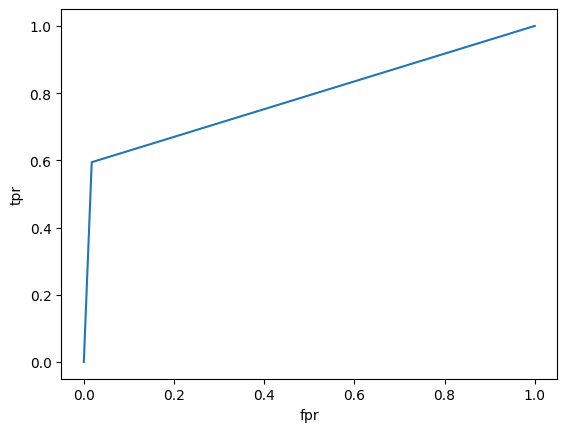

In [280]:
plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr');

Сравните между собой две лучшие модели:

1. Насколько сильно отличается качество предсказания на тестовых данных?
(Вычислите разность значений roc-auc.)

2. Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?

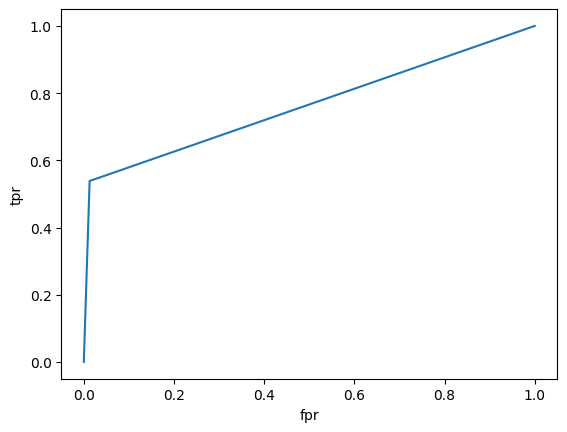

In [258]:
# ваш код здесь
tree_model = DecisionTreeClassifier(max_depth=4, criterion='gini')
tree_model.fit(X_train, y_train)
pred_tree = tree_model.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, pred_tree)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr');

In [263]:
# ваш код здесь
print(f'Разница между SVC и Tree моделями по roc-auc: {roc_auc_score(y_test, pred) - roc_auc_score(y_test, pred_tree)}')

Разница между SVC и Tree моделями по roc-auc: 0.025638305684980156


In [284]:
features = X.columns
importances = svc_model.coef_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices]) 
plt.xlabel('Relative Importance')
plt.show();

AttributeError: coef_ is only available when using a linear kernel

У SVC модели model.coef_ работает при kernel = 'linear', при любом другом отсутствует метод для того, чтобы вытащить воздействие параметров на целевую перменную.

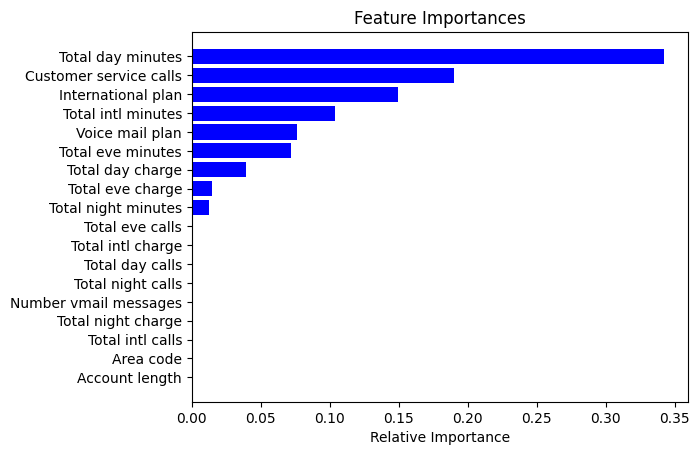

In [277]:
features = X.columns
importances = tree_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices]) 
plt.xlabel('Relative Importance')
plt.show();

Сделайте выводы:

1. Являются ли данные сбалансированными? Что это означает?
   
   Ответ: Нет, данные не  являются сбалансированными. Половина признаков вообще никака не влияют на распознование целевой переменной.

3. Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

   На мой взгляд - дерево решений, хоть SVC и выдало на каком то фолде больший процент.

5. Одинаковые ли признаки важны для работы двух наилучших моделей? Почему?

   Не смог ответить из-за модели SVC.